In [25]:
from fastai.vision.all import *
from ipywidgets import widgets
# data
path = untar_data(URLs.PETS)/'images'
 # label function
def is_cat(x):return x[0].isupper()
# dataloaders
dls = ImageDataLoaders.from_name_func(
    path,get_image_files(path), valid=0.2,seed=42,
    label_func=is_cat,item_tfms=Resize(224)
)
# train
learn = vision_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.184216,0.030561,0.989851,00:39


epoch,train_loss,valid_loss,accuracy,time
0,0.056641,0.031622,0.991204,00:42
1,0.035899,0.008456,0.996617,00:42


##모델 작동을 확인

In [45]:
# 사진 추가
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Cat?: False
accuracy probability: 0.001


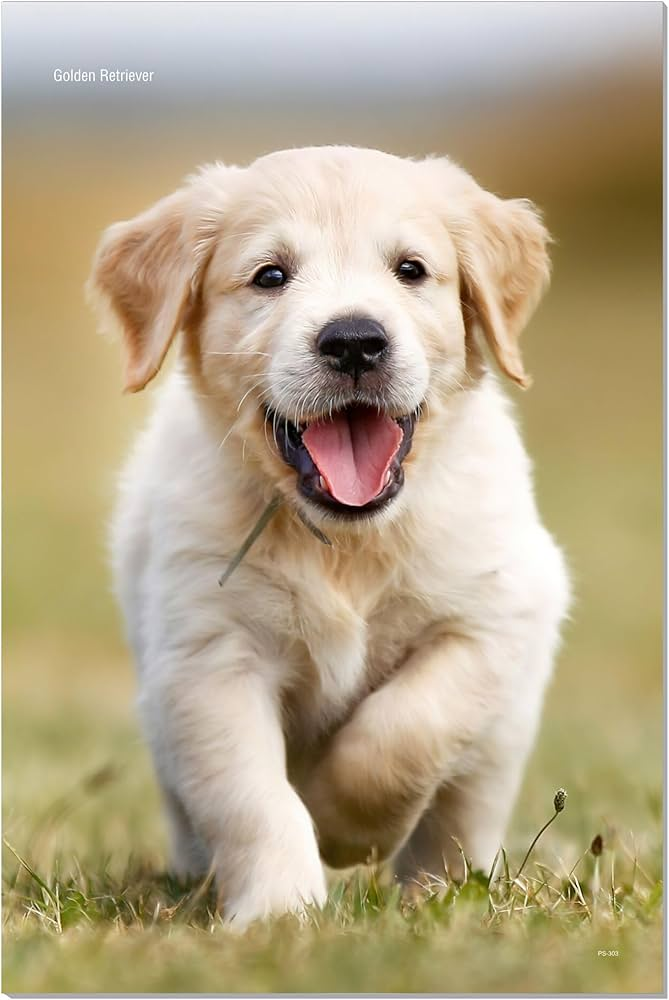

In [46]:
img = PILImage.create(upload.data[-1]) #사진
pred,_,prob = learn.predict(img) #predict
print(f'Cat?: {pred}')
print(f'accuracy probability: {prob[1].item():.3f}') #정확도 확률
img